# NSRDB and SAM for Solar Power Calculation
---

**NREL**: National Renewable Energy Laboratory

**NSRDB**: National Solar Radiation Database  
Information can be found at https://nsrdb.nrel.gov  
API key Signup: https://developer.nrel.gov/signup/  
API instructions: https://developer.nrel.gov/docs/solar/nsrdb/psm3_data_download/

**SAM**: System Advisor Model  
Information can be found at https://sam.nrel.gov/  
SDK: https://sam.nrel.gov/sdk. The SDK needs to be downloaded.

NSRDB is a serially complete collection of meteorological and solar irradiance data sets for the United States and a growing list of international locations. NSRDB uses a physics-based modeling (PSM: Physical Solar Model) approach to provide solar radiation data for the entire United States in gridded segments (4x4 square kilometer) using geostationary satellites. Data can be accessed via an API.

The [PVWatts v5](https://www.nrel.gov/docs/fy14osti/62641.pdf) model is used to estimate the power output.

In [1]:
from westernintnet.westernintnet import win_data as grid
import sys

sys.path.append("../")

import sam
import getpass
from matplotlib import pyplot
from helpers import to_reise

c:\program files\python\python36\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


Loading sub
Loading bus2sub
Loading bus
Loading genbus
Loading branches
Loading resources
Loading net_generation
Done loading


## 1. Solar plants in Network

In [2]:
solar_plant = grid.genbus.groupby('type').get_group('solar')

In [3]:
solar_plant.head()

,busID,Pg,Qg,Qmax,Qmin,Vg,mBase,status,Pmax,Pmin,...,mu_Qmax,mu_Qmin,type,lat,lon,GenMWMax,GenMWMin,AreaNum,ZoneName,base_color
plantID,,,,,,,,,,,,,,,,,,,,,
51,10760,0.00,0.0,0.0,0.0,1.0400,69.12,0,61.50,13.06,...,0.0,0.0000;,solar,45.584722,-122.405600,61.500001,13.060357,1,Washington,#feb308
57,10776,0.00,0.0,0.0,0.0,1.0318,32.07,0,28.00,3.77,...,0.0,0.0000;,solar,48.448100,-122.433100,28.000000,3.770000,1,Washington,#feb308
58,10776,14.32,0.0,0.0,0.0,1.0318,23.98,1,14.32,14.32,...,0.0,0.0000;,solar,48.448100,-122.433100,20.000000,6.145376,1,Washington,#feb308
61,10782,13.43,0.0,0.0,0.0,1.0162,27.32,1,13.43,13.43,...,0.0,0.0000;,solar,46.103887,-122.918429,18.333334,6.396563,1,Washington,#feb308
62,10782,14.65,0.0,0.0,0.0,1.0162,18.63,1,14.65,14.65,...,0.0,0.0000;,solar,46.103887,-122.918429,18.333334,7.370976,1,Washington,#feb308


In [4]:
print("There are %d solar plants in the Western grid." % len(solar_plant))

There are 391 solar plants in the Western grid.


## 2. Downloading Data
Visit https://developer.nrel.gov/signup/ to get your API key.

In [5]:
email = getpass.getpass(prompt='email=')
key = getpass.getpass(prompt='api_key=')
ssc_lib = 'U:\\SAM\\2017-9-5-r4\\win64\\'
data = sam.retrieve_data(solar_plant, email, key, ssc_lib)

email=········
api_key=········


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [34:53<00:00, 14.93s/it]


In [6]:
data.head(n=20)

,Pout,plantID,ts,tsID
0,0.0,51,2016-01-01,1
1,0.0,57,2016-01-01,1
2,0.0,58,2016-01-01,1
3,0.0,61,2016-01-01,1
4,0.0,62,2016-01-01,1
5,0.0,63,2016-01-01,1
6,0.0,64,2016-01-01,1
7,0.0,65,2016-01-01,1
8,0.0,66,2016-01-01,1
9,0.0,67,2016-01-01,1


## 3. Plot Data
One solar plant is selected. The power output (in MW) is then plotted for the entire year for 72-h in June.

In [7]:
id = 51
print("Capacity of the plant: %.1f MW" % solar_plant.loc[id].GenMWMax)

Capacity of the plant: 61.5 MW


In [8]:
data_oneplant = data[data.plantID == id]

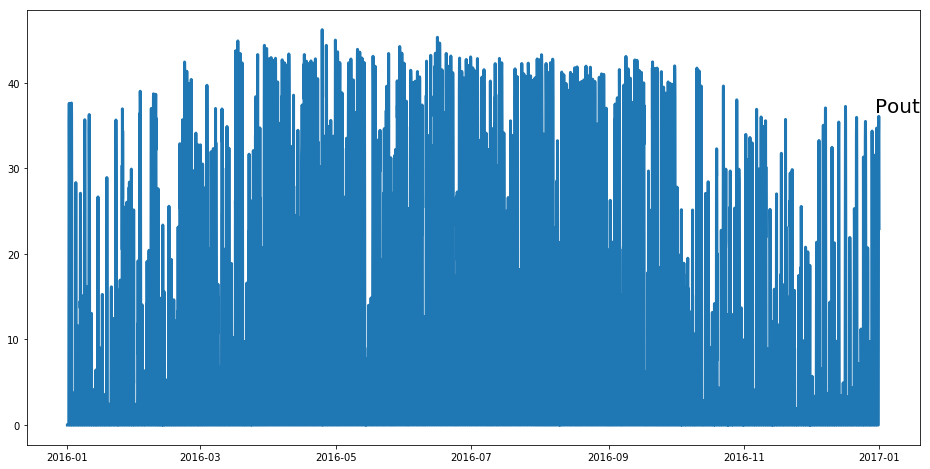

In [9]:
pyplot.figure(figsize=(16,8))
pyplot.plot(data_oneplant['ts'], data_oneplant['Pout'], lw=3)
pyplot.title('Pout', y=0.75, loc='right', fontsize=20)
pyplot.show()

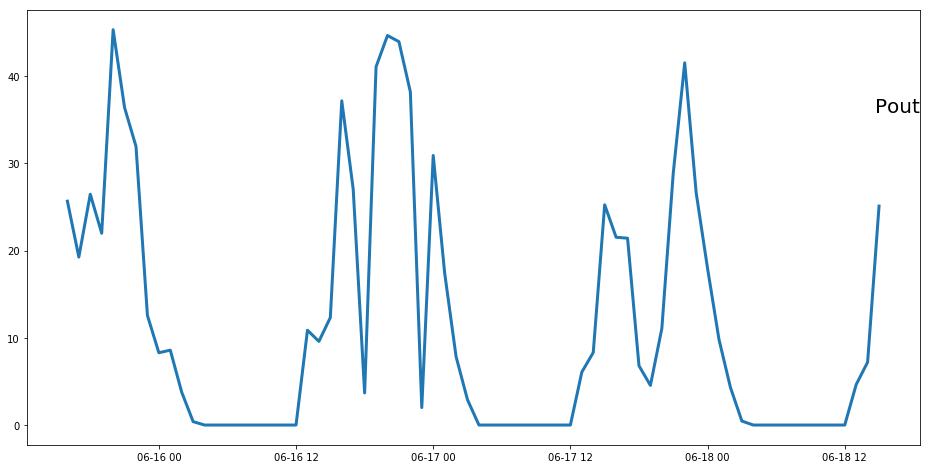

In [10]:
pyplot.figure(figsize=(16,8))
pyplot.plot(data_oneplant[4000:4072]['ts'], data_oneplant[4000:4072]['Pout'], lw=3)
pyplot.title('Pout', y=0.75, loc='right', fontsize=20)
pyplot.show()

In [11]:
print("Capacity Factor: %.3f" % (data_oneplant['Pout'].sum() / (366 * 24 * solar_plant.loc[id].GenMWMax)))

Capacity Factor: 0.142


## 4. Format Data
Data are formated for REISE

In [12]:
data_reise = to_reise(data)

In [13]:
data_reise.tail()

,51,57,58,61,62,63,64,65,66,67,...,2124,2125,2126,2285,2286,2287,2288,2363,2364,2484
UTC,,,,,,,,,,,,,,,,,,,,,
2016-12-31 19:00:00,35.991294,14.002942,10.002101,11.022806,11.022806,11.022806,19.729207,29.143143,19.729207,19.729207,...,22.173203,25.868736,7.021514,29.988788,6.394198,6.394198,29.988788,12.512557,11.052758,3.780789
2016-12-31 20:00:00,36.071523,14.173675,10.124054,11.021150,11.021150,11.021150,19.930692,29.440769,19.930692,19.930692,...,21.557823,25.150791,6.826643,29.530815,6.296549,6.296549,29.530815,12.333987,10.895022,3.516098
2016-12-31 21:00:00,34.485888,13.877465,9.912475,10.513261,10.513261,10.513261,19.357559,28.594160,19.357559,19.357559,...,19.784571,23.081996,6.265114,27.555527,5.875379,5.875379,27.555527,11.699117,10.334219,2.973877
2016-12-31 22:00:00,30.786717,12.452837,8.894883,9.329236,9.329236,9.329236,17.330088,25.599267,17.330088,17.330088,...,16.095459,18.778035,5.096895,23.839999,5.083155,5.083155,23.839999,10.327056,9.122232,2.143273
2016-12-31 23:00:00,22.959939,8.703360,6.216685,6.965674,6.965674,6.965674,12.087991,17.855866,12.087991,12.087991,...,7.883569,9.197496,2.496463,15.170746,3.234701,3.234701,15.170746,7.154029,6.319392,0.917560
